## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Load Dataset

In [2]:
df = pd.read_csv('3clean_dataset.csv')
df.sample(5)

,sellingprice,year,condition,odometer,mmr,date,make_acura,make_aston martin,make_audi,make_bentley,...,rank_rank_1,rank_rank_10,rank_rank_2,rank_rank_3,rank_rank_4,rank_rank_5,rank_rank_6,rank_rank_7,rank_rank_8,rank_rank_9
123691,7500,2013,3.1,34983.0,8925,28,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
182278,15600,2013,3.7,62520.0,16650,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
121206,11300,2013,3.8,48803.0,10950,12,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
387840,19400,2012,2.9,14796.0,19900,6,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19063,10800,2012,3.9,38602.0,11750,28,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df_final = df.copy()
df_final = df_final.drop(['date'],axis=1)
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='month')))]
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='day')))]

df_final.sample(5)

,sellingprice,year,condition,odometer,mmr,make_acura,make_aston martin,make_audi,make_bentley,make_bmw,...,rank_rank_1,rank_rank_10,rank_rank_2,rank_rank_3,rank_rank_4,rank_rank_5,rank_rank_6,rank_rank_7,rank_rank_8,rank_rank_9
222161,19600,2012,4.2,30803.0,17650,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
126049,17200,2013,5.0,4917.0,21100,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
275154,20100,2012,4.2,46021.0,20500,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
182954,22700,2014,3.8,29138.0,22300,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
258895,9200,2012,3.0,77346.0,9700,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
df_final.shape[1]

116

## Modelling

### Feature/Target

In [5]:
x = df_final.drop(['mmr','sellingprice'],axis=1)
y = df_final.loc[:,'sellingprice']

In [6]:
x, y

(        year  condition  odometer  make_acura  make_aston martin  make_audi  \
 0       2015        5.0   16639.0           0                  0          0   
 1       2015        5.0    9393.0           0                  0          0   
 2       2015        5.0   14634.0           0                  0          0   
 3       2015        5.0   13757.0           0                  0          0   
 4       2015        4.4   12862.0           0                  0          0   
 ...      ...        ...       ...         ...                ...        ...   
 517119  2015        4.7    4071.0           0                  0          0   
 517120  2015        4.8    4640.0           0                  0          0   
 517121  2015        4.9    3161.0           0                  0          0   
 517122  2015        4.9    3655.0           0                  0          0   
 517123  2015        4.8    8050.0           1                  0          0   
 
         make_bentley  make_bmw  make_

### train, test split

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=69) #Splitting the data into Train and Test
xtrain, xtest, ytrain, ytest

(        year  condition  odometer  make_acura  make_aston martin  make_audi  \
 339584  2014        4.0   28760.0           0                  0          0   
 128565  2012        4.8   39480.0           0                  0          0   
 509665  2007        2.6  108961.0           0                  0          0   
 448801  2005        2.4   82594.0           0                  0          0   
 219303  2010        3.6  152063.0           0                  0          0   
 ...      ...        ...       ...         ...                ...        ...   
 25015   2012        3.8   53265.0           0                  0          0   
 140890  2013        3.9   33675.0           0                  0          0   
 462793  2012        4.1   34711.0           0                  0          0   
 384203  2012        3.7   27624.0           0                  0          0   
 457782  2011        4.1   84717.0           0                  0          0   
 
         make_bentley  make_bmw  make_

### Standardizing

In [8]:
# num = ['year','condition','odometer']

In [9]:
# sc = StandardScaler()
# xtrain_scaled = xtrain.copy()
# xtest_scaled = xtest.copy()
# xtrain_scaled[num] = sc.fit_transform(xtrain_scaled[num])
# xtest_scaled[num] = sc.transform(xtest_scaled[num])

In [10]:
# xtrain_scaled, xtest_scaled

### Fitting and Model Evaluation

In [11]:
# reg_scaled = LinearRegression()
# ridge_scaled = Ridge()
# lasso_scaled = Lasso()
# en_scaled = ElasticNet()
# xg_scaled = XGBRegressor(verbosity=1)
# dt_scaled = DecisionTreeRegressor()

# model = [reg_scaled, ridge_scaled, lasso_scaled, en_scaled, xg_scaled, dt_scaled]
# me_summary_scaled = pd.DataFrame({'model':[],'r2_test':[],'r2_train':[],'r2_diff':[],'rmse':[],'mae':[]})

# for i in model:
#     i.fit(xtrain_scaled, ytrain)
#     r2_test = round(r2_score(ytest, i.predict(xtest_scaled)),4) * 100
#     r2_train = round(r2_score(ytrain, i.predict(xtrain_scaled)),4) * 100
#     rmse = round(mean_squared_error(ytest, i.predict(xtest_scaled), squared=False),2)
#     mae = round(mean_absolute_error(ytest, i.predict(xtest_scaled)),2)
#     name = f'{i}'.split('(')[0]
#     r2_diff = r2_test - r2_train
#     me_summary_scaled = me_summary_scaled.append({'model':name, 'r2_test':r2_test, 'r2_train':r2_train, 'r2_diff':r2_diff, 'rmse':rmse, 'mae':mae}, ignore_index=True)
#     # print(name, score, score_train, rmse, mae)
# me_summary_scaled

In [12]:
reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
xg = XGBRegressor(verbosity=1)
dt = DecisionTreeRegressor()

model = [reg, ridge, lasso, en, xg, dt]
me_summary = pd.DataFrame({'model':[],'r2_test':[],'r2_train':[],'r2_diff':[],'rmse':[],'mae':[]})

for i in model:
    i.fit(xtrain, ytrain)
    r2_test = round(r2_score(ytest, i.predict(xtest)),4) * 100
    r2_train = round(r2_score(ytrain, i.predict(xtrain)),4) * 100
    rmse = round(mean_squared_error(ytest, i.predict(xtest), squared=False),2)
    mae = round(mean_absolute_error(ytest, i.predict(xtest)),2)
    name = f'{i}'.split('(')[0]
    r2_diff = r2_test - r2_train
    me_summary = me_summary.append({'model':name, 'r2_test':r2_test, 'r2_train':r2_train, 'r2_diff':r2_diff, 'rmse':rmse, 'mae':mae}, ignore_index=True)
    # print(name, score, score_train, rmse, mae)
me_summary

,model,r2_test,r2_train,r2_diff,rmse,mae
0,LinearRegression,78.81,78.67,0.14,3775.33,2737.21
1,Ridge,78.81,78.67,0.14,3775.50,2737.30
2,Lasso,78.75,78.63,0.12,3780.73,2738.93
3,ElasticNet,60.03,60.08,-0.05,5185.75,3879.32
4,XGBRegressor,90.24,90.65,-0.41,2562.58,1733.96
5,DecisionTreeRegressor,83.33,100.00,-16.67,3348.50,2139.41


### Feature Selection

In [33]:
fi_summary = pd.DataFrame({'feature':x.columns,'importance':xg.feature_importances_}).sort_values('importance',ascending=False) 
fi_summary #DataFrame berisi feature dan nilai importancenya

,feature,importance
111,rank_rank_7,0.093162
110,rank_rank_6,0.085766
104,rank_rank_1,0.085094
109,rank_rank_5,0.068998
106,rank_rank_2,0.045214
...,...,...
76,color_lime,0.000000
36,make_oldsmobile,0.000000
21,make_isuzu,0.000000
61,transmission_manual,0.000000


In [35]:
fi_summary.head(60)

,feature,importance
111,rank_rank_7,0.093162
110,rank_rank_6,0.085766
104,rank_rank_1,0.085094
109,rank_rank_5,0.068998
106,rank_rank_2,0.045214
107,rank_rank_3,0.042467
7,make_bmw,0.038943
2,odometer,0.035885
56,body_supercrew,0.031319
5,make_audi,0.030686


Text(0.5, 1.0, 'Top 10 Features')

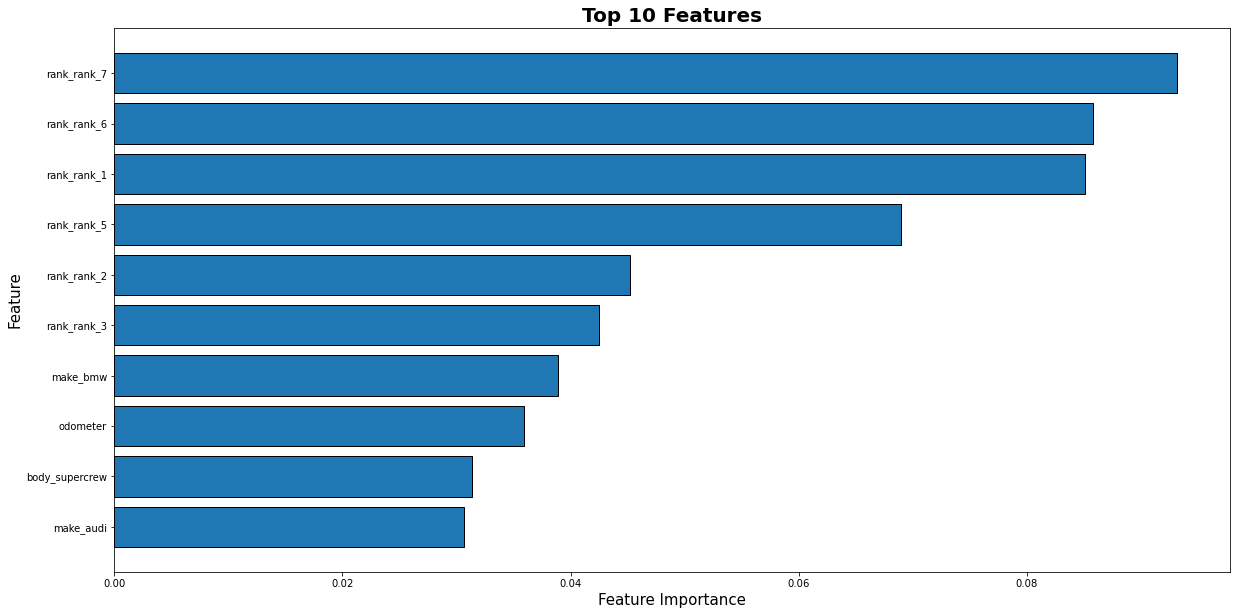

In [50]:
top_60 = fi_summary.head(50).sort_values('importance',ascending=True) #DataFrame berisi 60 feature dengan nilai importance tertinggi
plt.figure(figsize=(20,10))
plt.barh(top_60['feature'].tail(10), top_60['importance'].tail(10), edgecolor='black') #visualisasi fitur dan nilai importance-nya
plt.xlabel('Feature Importance', size=15)
plt.ylabel('Feature', size=15)
plt.title('Top 10 Features', weight='bold', size=20)

In [51]:
top_60_feature = fi_summary.sort_values('importance',ascending=False).head(60)['feature'] #Array berisi nama 50 fitur dengan importance tertinggi

df_60 = df_final[top_60_feature].copy() #DataFrame baru yang hanya berisi 50 fitur teratas
df_60['sellingprice'] = df_final['sellingprice'].copy() #Target
                       
df_60 #50 fitur terbaik dan 1 target

,rank_rank_7,rank_rank_6,rank_rank_1,rank_rank_5,rank_rank_2,rank_rank_3,make_bmw,odometer,body_supercrew,make_audi,...,make_scion,make_fiat,make_infiniti,interior_off-white,make_smart,body_coupe,body_van,color_black,rank_rank_10,sellingprice
0,0,0,0,0,0,0,0,16639.0,0,0,...,0,0,0,0,0,0,0,0,0,21500
1,0,0,0,0,0,0,0,9393.0,0,0,...,0,0,0,0,0,0,0,0,0,21500
2,0,0,0,0,0,0,0,14634.0,0,0,...,0,0,0,0,0,0,0,0,0,21500
3,0,0,0,0,0,0,0,13757.0,0,0,...,0,0,0,0,0,0,0,0,0,20750
4,0,0,0,0,0,0,0,12862.0,0,0,...,0,0,0,0,0,0,0,0,0,21000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517119,0,0,1,0,0,0,1,4071.0,0,0,...,0,0,0,0,0,0,0,1,0,39250
517120,0,0,1,0,0,0,1,4640.0,0,0,...,0,0,0,0,0,0,0,0,0,39500
517121,0,0,1,0,0,0,0,3161.0,0,0,...,0,0,0,0,0,0,0,0,0,32000
517122,0,0,1,0,0,0,0,3655.0,0,0,...,0,0,0,0,0,0,0,1,0,32000


### train, test split

In [52]:
x_60 = df_60.drop(['sellingprice'],axis=1)
y_60 = df_60.loc[:,'sellingprice']

In [53]:
from sklearn.model_selection import train_test_split
xtrain60, xtest60, ytrain60, ytest60 = train_test_split(x_60,y_60,test_size=0.2, random_state=69) #Splitting the data into Train and Test
xtrain60, xtest60, ytrain60, ytest60

(        rank_rank_7  rank_rank_6  rank_rank_1  rank_rank_5  rank_rank_2  \
 339584            0            1            0            0            0   
 128565            0            0            0            0            1   
 509665            0            1            0            0            0   
 448801            0            0            0            0            0   
 219303            0            0            0            0            1   
 ...             ...          ...          ...          ...          ...   
 25015             0            0            0            1            0   
 140890            0            1            0            0            0   
 462793            0            0            0            0            0   
 384203            0            0            0            0            0   
 457782            0            0            0            1            0   
 
         rank_rank_3  make_bmw  odometer  body_supercrew  make_audi  ...  \
 339584   

### Fitting

In [54]:
reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
xg = XGBRegressor(verbosity=1)
dt = DecisionTreeRegressor()

model = [reg, ridge, lasso, en, xg, dt]
me_summary = pd.DataFrame({'model':[],'r2_test':[],'r2_train':[],'r2_diff':[],'rmse':[],'mae':[]})

for i in model:
    i.fit(xtrain60, ytrain60)
    r2_test = round(r2_score(ytest60, i.predict(xtest60)),4) * 100
    r2_train = round(r2_score(ytrain60, i.predict(xtrain60)),4) * 100
    rmse = round(mean_squared_error(ytest60, i.predict(xtest60), squared=False),2)
    mae = round(mean_absolute_error(ytest60, i.predict(xtest60)),2)
    name = f'{i}'.split('(')[0]
    r2_diff = r2_test - r2_train
    me_summary = me_summary.append({'model':name, 'r2_test':r2_test, 'r2_train':r2_train, 'r2_diff':r2_diff, 'rmse':rmse, 'mae':mae}, ignore_index=True)
    # print(name, score, score_train, rmse, mae)
me_summary

,model,r2_test,r2_train,r2_diff,rmse,mae
0,LinearRegression,78.68,78.53,0.15,3787.66,2746.07
1,Ridge,78.68,78.53,0.15,3787.67,2746.05
2,Lasso,78.64,78.51,0.13,3790.47,2746.51
3,ElasticNet,59.84,59.88,-0.04,5197.89,3889.88
4,XGBRegressor,90.13,90.47,-0.34,2576.51,1735.01
5,DecisionTreeRegressor,82.48,100.00,-17.52,3432.98,2202.17


### Feature Selection

In [55]:
fi_summary = pd.DataFrame({'feature':x_60.columns,'importance':xg.feature_importances_}).sort_values('importance',ascending=False) 
fi_summary #DataFrame berisi feature dan nilai importancenya

,feature,importance
0,rank_rank_7,0.080495
2,rank_rank_1,0.074894
3,rank_rank_5,0.073245
1,rank_rank_6,0.072240
4,rank_rank_2,0.049596
9,make_audi,0.048186
5,rank_rank_3,0.043936
6,make_bmw,0.041944
10,year,0.033066
8,body_supercrew,0.032123


<BarContainer object of 10 artists>

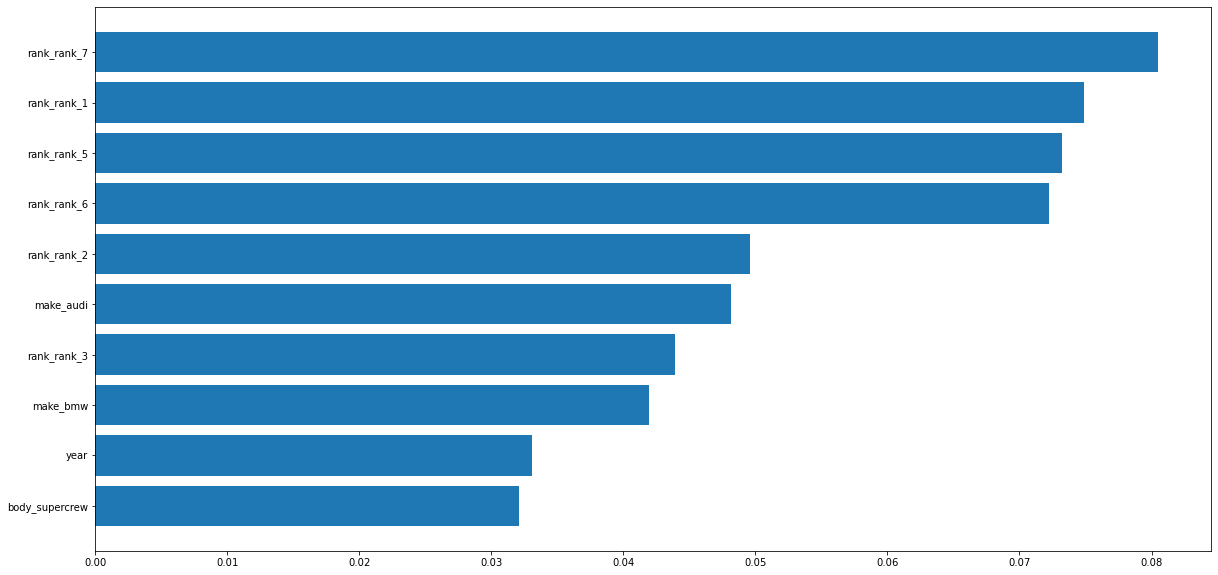

In [57]:
top_30 = fi_summary.head(30).sort_values('importance',ascending=True) #DataFrame berisi 30 feature dengan nilai importance tertinggi
plt.figure(figsize=(20,10))
plt.barh(top_30['feature'].tail(10),top_30['importance'].tail(10)) #visualisasi fitur dan nilai importance-nya

### Hyperparameter Tuning

In [159]:
hyperparameters = dict(
    learning_rate=[0.05, 0.1, 0.2], 
    n_estimators=[100, 400, 800],
    max_depth=[3, 6, 9], 
    min_child_weight=[1, 10, 100]
)

rs = RandomizedSearchCV(xg, hyperparameters, n_jobs=3, cv=5, verbose=1, n_iter=30, refit='r2', scoring=['r2','neg_root_mean_squared_error'])
rs.fit(xtrain30, ytrain30)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimato...
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha

In [164]:
rs.refit_time_

134.6088092327118

In [163]:
rs.scorer_

{'r2': make_scorer(r2_score),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False)}

In [162]:
rs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=9, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=1)

In [160]:
rs.best_params_

{'n_estimators': 400,
 'min_child_weight': 10,
 'max_depth': 9,
 'learning_rate': 0.05}

In [165]:
rs.best_score_

0.8096239206334832

### Fitting (Using Optimal Parameter)

In [58]:
reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
xg = XGBRegressor(n_estimators = 400,
                  min_child_weight = 10,
                  max_depth = 9,
                  learning_rate = 0.05)
dt = DecisionTreeRegressor()

model = [reg, ridge, lasso, en, xg, dt]
me_summary = pd.DataFrame({'model':[],'r2_test':[],'r2_train':[],'r2_diff':[],'rmse':[],'mae':[]})

for i in model:
    i.fit(xtrain60, ytrain60)
    r2_test = round(r2_score(ytest60, i.predict(xtest60)),4) * 100
    r2_train = round(r2_score(ytrain60, i.predict(xtrain60)),4) * 100
    rmse = round(mean_squared_error(ytest60, i.predict(xtest60), squared=False),2)
    mae = round(mean_absolute_error(ytest60, i.predict(xtest60)),2)
    name = f'{i}'.split('(')[0]
    r2_diff = r2_test - r2_train
    me_summary = me_summary.append({'model':name, 'r2_test':r2_test, 'r2_train':r2_train, 'r2_diff':r2_diff, 'rmse':rmse, 'mae':mae}, ignore_index=True)
    # print(name, score, score_train, rmse, mae)
me_summary

,model,r2_test,r2_train,r2_diff,rmse,mae
0,LinearRegression,78.68,78.53,0.15,3787.66,2746.07
1,Ridge,78.68,78.53,0.15,3787.67,2746.05
2,Lasso,78.64,78.51,0.13,3790.47,2746.51
3,ElasticNet,59.84,59.88,-0.04,5197.89,3889.88
4,XGBRegressor,91.15,91.82,-0.67,2440.31,1610.64
5,DecisionTreeRegressor,82.51,100.00,-17.49,3430.76,2202.64


## Business

In [113]:
bi = df[top_60_feature].copy() #DataFrame baru yang hanya berisi 25 fitur teratas
bi['sellingprice'] = df['sellingprice'].copy() #Target
bi['mmr'] = df['mmr'].copy()
x = bi.drop(['sellingprice','mmr'],axis=1)
bi['new_predict'] = xg.predict(x)                      
bi.sample(5) #25 fitur terbaik dan 1 target

,rank_rank_7,rank_rank_6,rank_rank_1,rank_rank_5,rank_rank_2,rank_rank_3,make_bmw,odometer,body_supercrew,make_audi,...,make_infiniti,interior_off-white,make_smart,body_coupe,body_van,color_black,rank_rank_10,sellingprice,mmr,new_predict
437875,1,0,0,0,0,0,0,153986.0,0,0,...,0,0,0,0,0,0,0,1400,2925,4102.107910
421151,0,0,0,0,0,0,0,5327.0,0,0,...,0,0,0,0,0,0,0,21200,21800,25844.982422
7174,0,0,0,0,0,1,1,49011.0,0,0,...,0,0,0,0,0,0,0,26000,24800,28708.109375
398059,1,0,0,0,0,0,0,51626.0,0,0,...,0,0,0,0,0,1,0,10600,12550,8331.501953
185544,0,1,0,0,0,0,0,60066.0,0,0,...,0,0,0,0,0,0,0,8300,7625,8224.133789


In [64]:
raw = pd.read_csv('car_prices.csv', on_bad_lines='skip')

In [121]:
bi['selisih_mmr'] = bi['sellingprice'] - bi['mmr']
bi['selisih_new'] = bi['sellingprice'] - bi['new_predict']
bi

,rank_rank_7,rank_rank_6,rank_rank_1,rank_rank_5,rank_rank_2,rank_rank_3,make_bmw,odometer,body_supercrew,make_audi,...,make_smart,body_coupe,body_van,color_black,rank_rank_10,sellingprice,mmr,new_predict,selisih_mmr,selisih_new
0,0,0,0,0,0,0,0,16639.0,0,0,...,0,0,0,0,0,21500,20500,20264.710938,1000,1235.289062
1,0,0,0,0,0,0,0,9393.0,0,0,...,0,0,0,0,0,21500,20800,20911.644531,700,588.355469
2,0,0,0,0,0,0,0,14634.0,0,0,...,0,0,0,0,0,21500,20600,20127.589844,900,1372.410156
3,0,0,0,0,0,0,0,13757.0,0,0,...,0,0,0,0,0,20750,20600,20505.607422,150,244.392578
4,0,0,0,0,0,0,0,12862.0,0,0,...,0,0,0,0,0,21000,20700,20129.941406,300,870.058594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517119,0,0,1,0,0,0,1,4071.0,0,0,...,0,0,0,1,0,39250,41500,40089.414062,-2250,-839.414062
517120,0,0,1,0,0,0,1,4640.0,0,0,...,0,0,0,0,0,39500,41500,39592.601562,-2000,-92.601562
517121,0,0,1,0,0,0,0,3161.0,0,0,...,0,0,0,0,0,32000,35000,35294.984375,-3000,-3294.984375
517122,0,0,1,0,0,0,0,3655.0,0,0,...,0,0,0,1,0,32000,34300,35650.996094,-2300,-3650.996094


In [ ]:
bi[(bi['selisih_new']>0)&(bi['selisih_mmr']>0)].sample(5)

,rank_rank_7,rank_rank_6,rank_rank_1,rank_rank_5,rank_rank_2,rank_rank_3,make_bmw,odometer,body_supercrew,make_audi,...,make_smart,body_coupe,body_van,color_black,rank_rank_10,sellingprice,mmr,new_predict,selisih_mmr,selisih_new
66150,1,0,0,0,0,0,0,91887.0,0,0,...,0,0,0,0,0,7200,6425,6222.646484,775,977.353516
469459,0,0,0,0,0,0,0,70469.0,0,0,...,0,0,0,1,0,6000,3675,5912.115723,2325,87.884277
278543,0,1,0,0,0,0,0,43328.0,0,0,...,0,0,0,0,0,11400,10450,10279.552734,950,1120.447266
51163,0,0,0,1,0,0,0,17187.0,0,0,...,0,0,0,0,0,17200,15650,16598.615234,1550,601.384766
30374,0,0,0,1,0,0,0,33918.0,0,0,...,0,0,0,0,0,13600,11650,12712.785156,1950,887.214844


In [122]:
raw[(raw['mmr']==3675)&(raw['sellingprice']==6000)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
304067,2006,Chrysler,PT Cruiser,Touring,Convertible,automatic,3c3hy55x66t228017,mi,4.9,70469.0,black,tan,kevins marysville auto sales inc,3675,6000,Thu Feb 19 2015 01:30:00 GMT-0800 (PST)


In [124]:
raw[(raw['mmr']==6425)&(raw['sellingprice']==7200)&(raw['odometer']==91887)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
484223,2010,Chevrolet,Impala,LT,sedan,automatic,2g1wb5en9a1206681,tn,2.9,91887.0,—,gray,dt credit corporation,6425,7200,Tue Jun 02 2015 03:30:00 GMT-0700 (PDT)


In [ ]:
raw[(raw['mmr']==15650)&(raw['sellingprice']==17200)&(raw['odometer']==16598)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
239067,2013,Ford,Fusion,SE,Sedan,automatic,3fa6p0hr3dr232399,ny,4.2,17187.0,off-white,black,"ford motor credit company,llc",15650,17200,Wed Feb 11 2015 01:20:00 GMT-0800 (PST)


In [127]:
raw[(raw['mmr']==11650)&(raw['sellingprice']==13600)&(raw['odometer']==33918)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
524029,2012,Nissan,Altima,2.5,sedan,automatic,1n4al2ap5cn493478,nj,4.3,33918.0,—,black,nissan-infiniti lt,11650,13600,Wed Jun 17 2015 02:30:00 GMT-0700 (PDT)


In [128]:
raw[(raw['mmr']==10450)&(raw['sellingprice']==11400)&(raw['odometer']==43328)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
52829,2012,Ford,Focus,SEL,Sedan,automatic,1fahp3h23cl393622,nc,5.0,43328.0,red,black,medlin buick gmc mazda,10450,11400,Tue Jan 06 2015 01:15:00 GMT-0800 (PST)


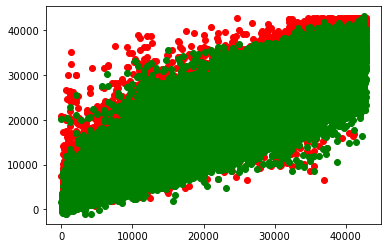

In [106]:
plt.scatter('sellingprice','mmr',data=bi,color='red')
plt.scatter('sellingprice','new_predict',data=bi,color='green')

In [90]:
bi['selisih_mmr'].sum()/bi.shape[0]

-156.30114053882627

In [31]:
bi['selisih_new'].sum()/bi.shape[0]

-0.3790185076262394

In [32]:
bi.describe()

,sellingprice,mmr,new_predict,selisih_mmr,selisih_new
count,517124.000000,517124.000000,517124.000000,517124.000000,517124.000000
mean,13513.289905,13669.591046,13513.698242,-156.301141,-0.379019
std,8219.619733,8116.931493,7695.686523,1643.479591,2748.316866
min,1.000000,25.000000,-850.758423,-33800.000000,-27319.359375
25%,7600.000000,7850.000000,7831.608398,-800.000000,-1351.106201
50%,12400.000000,12500.000000,12632.900391,-50.000000,-218.804199
75%,18200.000000,18350.000000,18346.830566,650.000000,996.705200
max,42800.000000,42800.000000,44120.648438,30475.000000,28591.500977


In [34]:
bi['selisih_mmr'].sum()

-80827071

In [35]:
bi['selisih_new'].sum()

-195999.56673771143

In [ ]:
bi